#### **Machine Learning Prediction of Customer Churn Status**
Customer churn prediction is a binary classification problem where we estimate the probability that a customer will leave using historical behavioral, transactional, and demographic data.

# Machine Learning Prediction of Customer Churn Status

## Lecture Notes

Customer churn refers to the situation where a customer stops doing business with a company within a given time period. In subscription-based businesses such as telecommunications, banking, insurance, and streaming services, churn directly affects revenue and long-term sustainability. Predicting churn allows organizations to intervene early through retention strategies.

From a machine learning perspective, churn prediction is formulated as a **supervised classification problem**. The target variable is binary:

$$
Y =
\begin{cases}
1 & \text{Customer churned} \
0 & \text{Customer retained}
\end{cases}
$$

Given a feature vector $X = (x_1, x_2, \ldots, x_p)$, the goal is to estimate:

$$
P(Y = 1 \mid X)
$$

A classification threshold $\tau$ (often 0.5) is used to convert probabilities into class labels.

---

## Understanding the Data

The quality of a churn model depends heavily on the available features. Typical churn datasets contain three major categories of variables.

Demographic variables may include age, gender, income level, and location. These variables help segment customers but often have limited predictive power when used alone.

Behavioral variables are usually more informative. These include purchase frequency, average transaction value, number of service interactions, product usage frequency, complaints, and days since last activity. Behavioral features capture engagement patterns and are strong indicators of churn risk.

Contractual or subscription-related variables include tenure (how long the customer has been with the company), contract type, payment method, subscription plan, and renewal history. In many industries, tenure is one of the strongest predictors of churn.

---

## Data Preprocessing

Before model training, the data must be prepared carefully.

Missing values should be handled appropriately. Numerical variables may be imputed using the mean or median, while categorical variables are typically imputed using the mode.

Categorical variables must be encoded into numerical form. Label encoding or one-hot encoding are common approaches. One-hot encoding is generally preferred when categories have no ordinal meaning.

Feature scaling may be necessary for certain algorithms such as Support Vector Machines and Logistic Regression. Standardization transforms features to have mean zero and unit variance.

Churn datasets are often imbalanced, meaning the number of non-churners exceeds churners. In such cases, techniques such as class weighting, oversampling (e.g., SMOTE), or undersampling can be applied to balance the classes.

---

## Model Development

A baseline model such as Logistic Regression is often used first. Logistic Regression models the log-odds of churn as a linear function of predictors:

$$
\log\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p
$$

Although simple, it provides interpretability and serves as a benchmark.

Ensemble methods such as Random Forest improve predictive performance by combining multiple decision trees. Random Forest reduces variance through bagging and is robust to noise and non-linear relationships.

Gradient boosting models, particularly XGBoost, often achieve superior performance in churn prediction tasks. Boosting builds trees sequentially, correcting previous errors and minimizing a loss function through gradient descent.

Other algorithms that may be considered include Support Vector Machines and Neural Networks, especially when dealing with high-dimensional or complex data structures.

---

## Model Evaluation

Accuracy alone is not sufficient in churn prediction because of class imbalance. A model predicting all customers as non-churners may still achieve high accuracy.

Key evaluation metrics include precision, recall, F1-score, and ROC-AUC.

Recall (sensitivity) for the churn class is particularly important. It measures the proportion of actual churners correctly identified:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Failing to identify a churner represents a lost business opportunity.

The ROC curve plots the True Positive Rate against the False Positive Rate across thresholds. The Area Under the Curve (AUC) provides a threshold-independent performance measure.

---

## Feature Importance and Interpretation

Understanding why a model predicts churn is as important as the prediction itself. Tree-based models provide feature importance measures based on impurity reduction or gain.

More advanced interpretability techniques such as SHAP values allow explanation of individual predictions and quantify each feature’s contribution.

Interpretability is crucial for translating model outputs into actionable business strategies.

---

## Business Application

Once probabilities of churn are estimated, customers can be segmented based on risk levels. High-risk customers may receive targeted retention offers, discounts, or personalized communication. Medium-risk customers may be engaged through loyalty programs, while low-risk customers require minimal intervention.

The classification threshold can be adjusted depending on the business cost of false positives and false negatives. If losing a customer is expensive, a lower threshold may be chosen to capture more potential churners.

---

## Extensions

More advanced approaches include survival analysis for modeling time-to-churn, time-series modeling for behavioral trends, and ensemble stacking for improved predictive performance.

In practice, churn prediction is not only a modeling problem but also a strategic decision-making tool. The ultimate goal is not just high accuracy, but maximizing customer lifetime value and organizational profitability.



##### **Load the Required Libraries**|

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Read the Dataset from the  Local Directory**

In [ ]:
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


#### **Read the Imported Data as Data Frame**

In [ ]:
df  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Check the Data Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### **Change the Total Charges From Object  to Numeric (Or Simply Coerce it to Numeric)**

In [ ]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors = 'coerce')
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-191/1495206631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(mean_total_charges, inplace = True)


#### **Convert all Object Variables to Categorical**

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### **Visualization of the Target Variable**

/tmp/ipython-input-191/1985789085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data = df, palette = 'viridis')


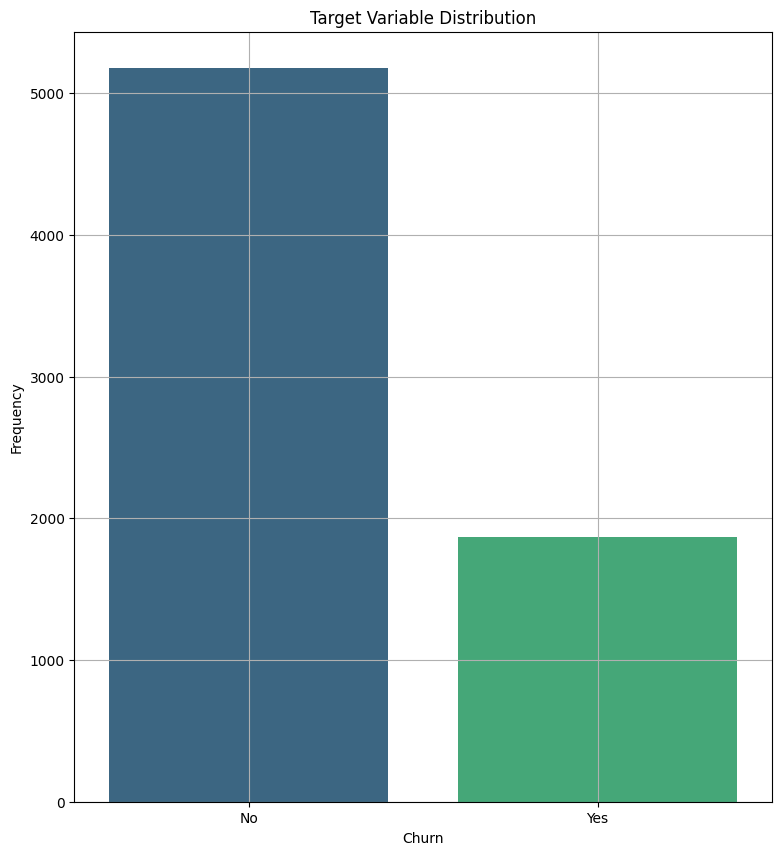

In [ ]:
plt.figure(figsize=(9,10))
ax = sns.countplot(x='Churn', data = df, palette = 'viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipython-input-191/4055626521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data = df, palette = 'viridis')


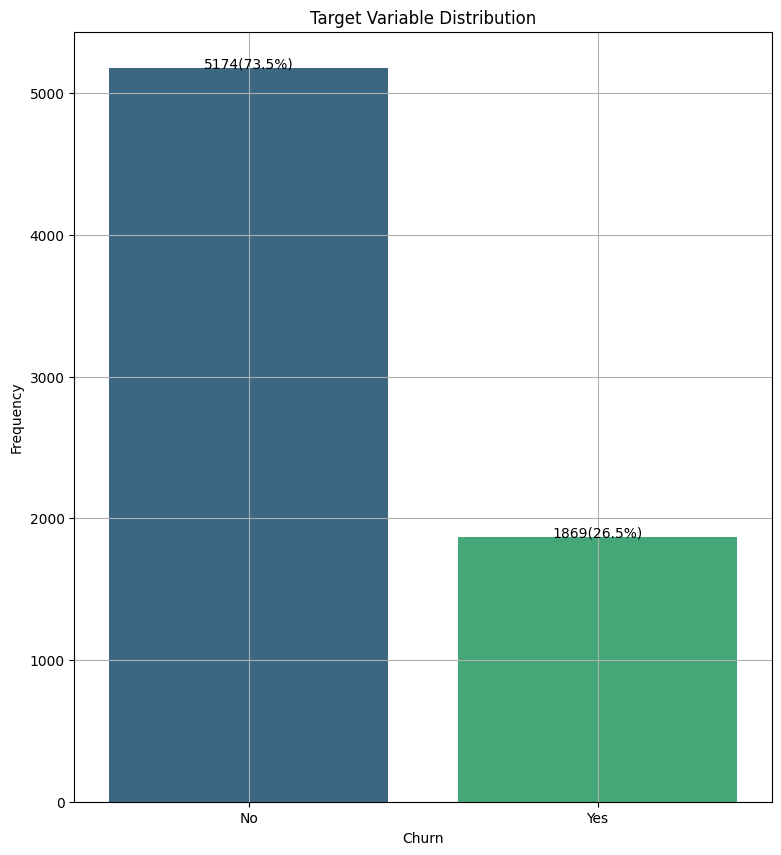

In [ ]:
plt.figure(figsize=(9,10))
ax = sns.countplot(x='Churn', data = df, palette = 'viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Churn')
plt.ylabel('Frequency')

total = len(df['Churn'])
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height +3,
          f'{int(height)}({(height/total)*100:.1f}%)',
          ha='center')

plt.grid(True)
plt.show()

#### **Check for the Missing Values**

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **Check for the Presence off Outliers**

#### **Create the Target Variable and the Preddictor Matrix**

In [ ]:
X = df.drop(['Churn','customerID'], axis =1)
y = df['Churn']

#### **View the X-Matrix and the Target Variable**

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


#### **Create Dummies Variables**

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


##### **Convert the One-Hot Encoding to 1 and 0**

In [ ]:
X = X.astype(int)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


#### **Split the Data into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,21,64,1336,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1623,0,54,97,5129,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
6074,0,1,23,23,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1362,0,4,70,237,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
6754,0,0,61,2283,1,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0


### **Develop the KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### **Initialize the Model Training with Automatic selection of k-value**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
##knn_model = KNeighborsClassifier()

### **Train the KNN-Model**

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### **Check the Number of Neighbors**

In [ ]:
knn_model.n_neighbors

5

#### **Prediction**

In [ ]:
knn_pred = knn_model.predict(X_test)
knn_pred[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [ ]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,21,64,1336,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1623,0,54,97,5129,0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,0
6074,0,1,23,23,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1362,0,4,70,237,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
6754,0,0,61,2283,1,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0


#### **Check the Model's Performance**

In [ ]:
### Calculate the Evaluation
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
class_report = classification_report(y_test, knn_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7814
Confusion Matrix:
[[923 113]
 [195 178]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1036
         Yes       0.61      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In evaluating a classification model, several performance metrics are used to assess how well the model distinguishes between classes. In this case, the target variable is customer churn status (“No” = not churned, “Yes” = churned).

**Precision** measures the proportion of predicted positive cases that are actually positive. It answers the question: *Of all customers predicted to churn, how many truly churned?* High precision indicates a low false-positive rate.

**Recall** (also called sensitivity or true positive rate) measures the proportion of actual positive cases that were correctly identified. It answers: *Of all customers who truly churned, how many did the model correctly detect?* High recall means few false negatives.

**F1-score** is the harmonic mean of precision and recall. It balances both metrics and is especially useful when dealing with imbalanced classes. A higher F1-score indicates a better trade-off between precision and recall.

**Support** refers to the number of actual observations in each class within the test dataset.

**Accuracy** measures the overall proportion of correctly classified instances out of all observations. However, it can be misleading in imbalanced datasets.

**Macro average** computes the unweighted mean of precision, recall, and F1-score across classes, treating each class equally.

**Weighted average** computes the mean of these metrics weighted by the number of instances in each class, thus accounting for class imbalance.

### Report of Results

The model achieved an overall **accuracy of 78%**, correctly classifying 1,409 customers. However, the dataset is imbalanced, with 1,036 non-churners (“No”) and 373 churners (“Yes”).

For the **“No” class**, the model performed strongly, with a **precision of 0.83**, meaning 83% of customers predicted as non-churners were correctly identified. The **recall of 0.89** indicates that 89% of actual non-churners were correctly classified. The corresponding **F1-score of 0.86** reflects robust and consistent performance for this majority class.

For the **“Yes” class**, performance was weaker. The **precision of 0.61** indicates that 61% of predicted churners were truly churners. The **recall of 0.48** shows that the model identified only 48% of actual churners, missing more than half of them. The **F1-score of 0.54** reflects this imbalance between precision and recall.

The **macro-average F1-score of 0.70** suggests moderate overall balance across classes, while the **weighted F1-score of 0.77** is higher due to stronger performance on the majority class. Overall, the model performs well for non-churn prediction but requires improvement in detecting churners.


#### **Plot the Confusion Plot**

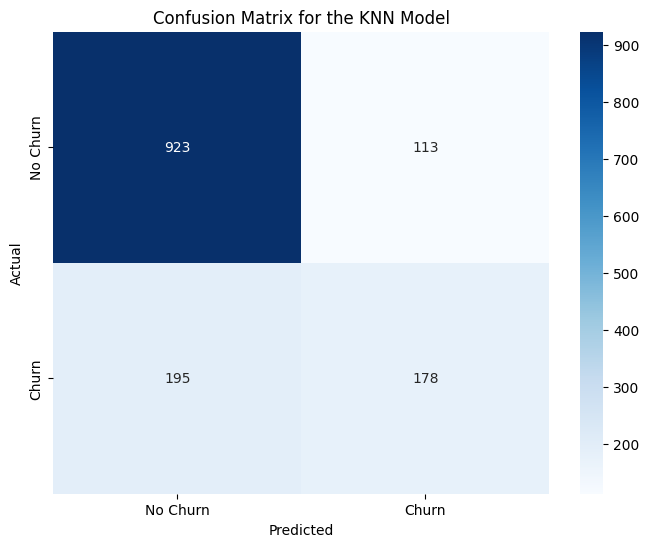

In [ ]:
#### plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for the KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **ROC and AUC Valuee**

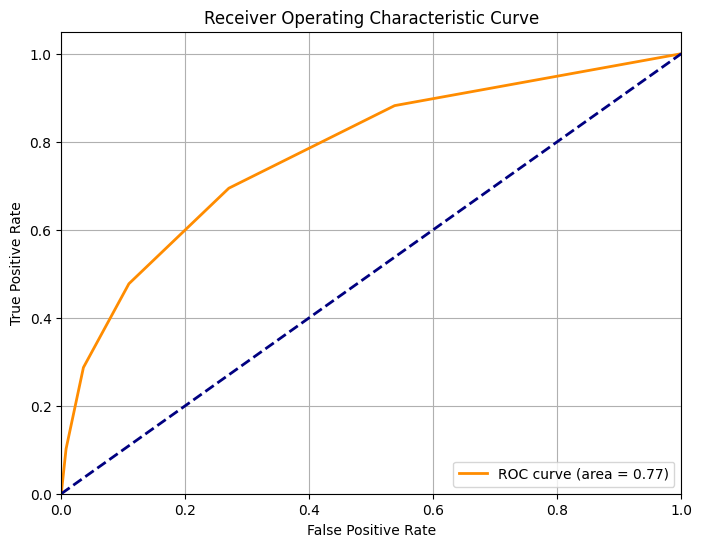

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Calculate ROC
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

### **Featuree Importance Plot**

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    knn_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(
    by='Importance',
    ascending=False
)
importance_df

,Feature,Importance
3,TotalCharges,1.222143e-01
2,MonthlyCharges,1.019872e-01
1,tenure,1.249113e-02
26,PaperlessBilling_Yes,2.555004e-03
0,SeniorCitizen,2.271114e-03
9,MultipleLines_Yes,1.490419e-03
28,PaymentMethod_Electronic check,1.206529e-03
5,Partner_Yes,1.206529e-03
4,gender_Male,1.135557e-03
29,PaymentMethod_Mailed check,9.226402e-04


/tmp/ipython-input-191/3072172237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


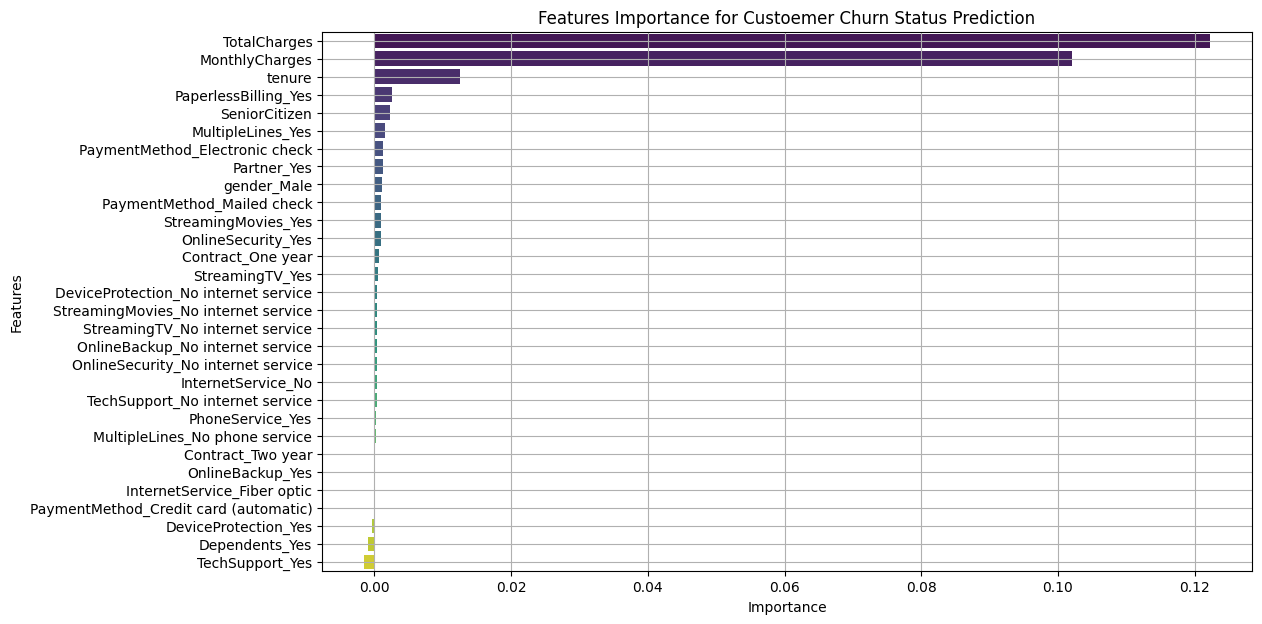

In [ ]:
### Plot the Importance Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Features Importance for Custoemer Churn Status Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()


### **Support Vectors Machines**

### **Default SVM**

In [ ]:
### Initialize the Support Vectors Machines
from sklearn.svm import SVC

### Initialize the Training Procees
svm_model = SVC(random_state = 42)

### Train the Model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

#### **RBF Kernel**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    probability=True,   # VERY IMPORTANT
    random_state=42
)

svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

##### **Using Linear Kernel**

In [ ]:
#svm_model = SVC(kernel='linear')
#svm_model.fit(X_train, y_train)

### **Predict the Customer Churn Status**

In [ ]:
### predict
svm_pred = svm_model.predict(X_test)
svm_pred[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [ ]:
y_test.head()

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


### Evaluate the Performance

In [ ]:
### Evaluate the Performance
accuracy = accuracy_score(y_test, svm_pred)
conf_matrix = confusion_matrix(y_test, svm_pred)
class_report = classification_report(y_test, svm_pred)
print(f"Accuracy: {accuracy:.4f}")
print(conf_matrix)

Accuracy: 0.7353
[[1036    0]
 [ 373    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(class_report)

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1036
         Yes       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



### Report of SVM Results

The Support Vector Machine (SVM) model achieved an overall **accuracy of 74%**, correctly classifying 1,409 observations. However, the dataset is imbalanced, with 1,036 non-churners (“No”) and 373 churners (“Yes”).

For the **“No” class**, the model achieved a **precision of 0.74** and a **recall of 1.00**, meaning it correctly identified all actual non-churners. The **F1-score of 0.85** indicates strong performance for this majority class. The perfect recall suggests the model predicted nearly all observations as “No.”

For the **“Yes” class**, the model performed extremely poorly. The **precision, recall, and F1-score are all 0.00**, indicating that the model failed to correctly identify any churners. In practical terms, the SVM did not detect a single positive case. This implies a severe class imbalance issue or that the model is biased toward predicting the majority class.

The **macro-average F1-score of 0.42** reflects poor balanced performance across classes, while the **weighted F1-score of 0.62** is inflated by the dominance of the majority class.

Overall, although the SVM achieved moderate accuracy, it completely failed in identifying churners, making it unsuitable for churn prediction without class balancing or model tuning.


#### **Confusion Matrix**

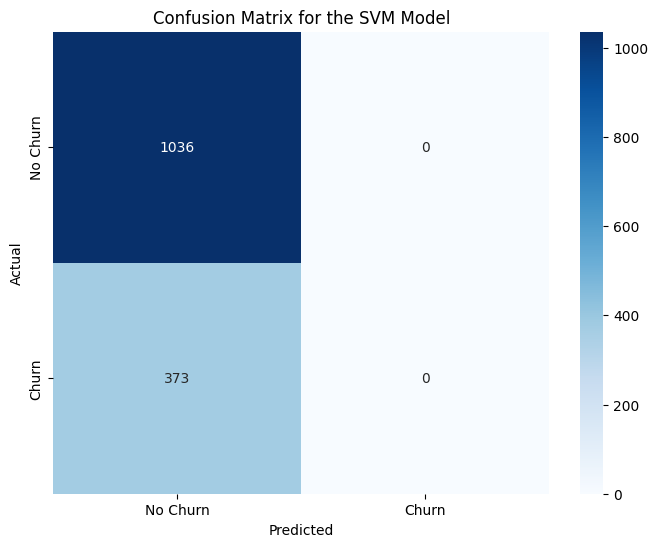

In [ ]:
### Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for the SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### **ROC and AUC Value**

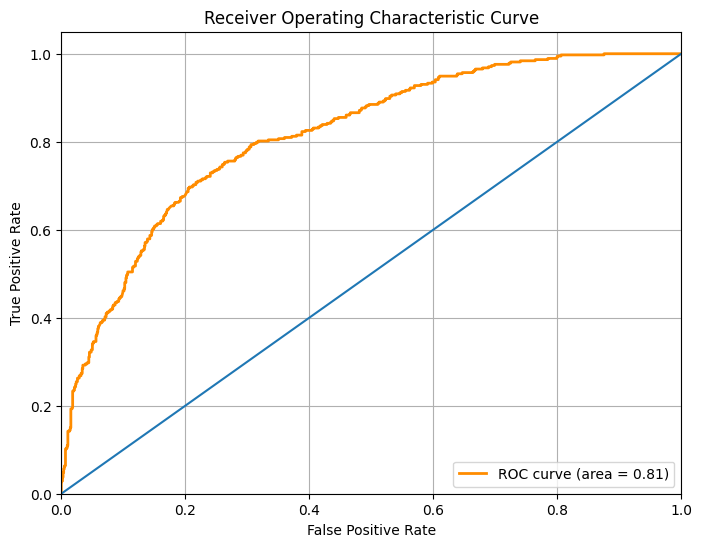

In [ ]:
### Plot the ROC and AUC value
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)
roc_auc = auc(fpr, tpr)


### Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1],[0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

### **Features Importance Plot**

In [ ]:
### Permutation plot for Features Important
from sklearn.inspection import permutation_importance


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42
)
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values(
    by='Importance',
    ascending=False
)
importance_df

,Feature,Importance
0,SeniorCitizen,0.0
1,tenure,0.0
2,MonthlyCharges,0.0
3,TotalCharges,0.0
4,gender_Male,0.0
5,Partner_Yes,0.0
6,Dependents_Yes,0.0
7,PhoneService_Yes,0.0
8,MultipleLines_No phone service,0.0
9,MultipleLines_Yes,0.0


/tmp/ipython-input-191/3371909207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


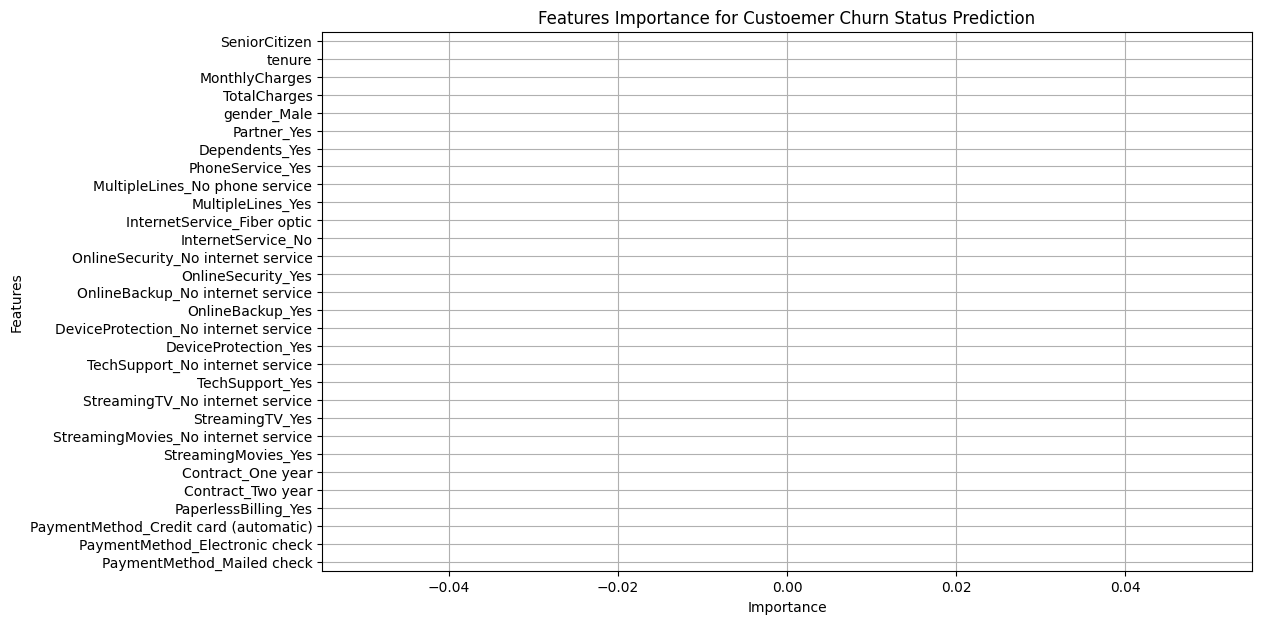

In [ ]:
### Plot the Importance Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Features Importance for Custoemer Churn Status Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()

#### **Features Importance Plot for Linear Based Kernel**

In [ ]:
feature_importance = svm_model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(feature_importance)
}).sort_values(by='Importance', ascending=False)

importance_df

AttributeError: coef_ is only available when using a linear kernel

##### **Develop the Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Initialization Process
rf_model = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 10,
    min_samples_split= 5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state = 42)

In [ ]:
### Training Process
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

#### **Prediction using the Estimated Random Forest Model**

In [ ]:
dir(rf_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [ ]:
y_test[:5]

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


#### **Model Performance and Confussion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

### Calculate the Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, pos_label='Yes')
f1 = f1_score(y_test, y_pred_rf, pos_label='Yes')
recall = recall_score(y_test, y_pred_rf, pos_label='Yes')
conf_matrix =confusion_matrix(y_test, y_pred_rf)

#### **Print the Ressults**

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7878
Precision: 0.5714
F1 Score: 0.6644
Recall: 0.7936
Confusion Matrix:
[[814 222]
 [ 77 296]]


### **Plot the Confusion Matrix**

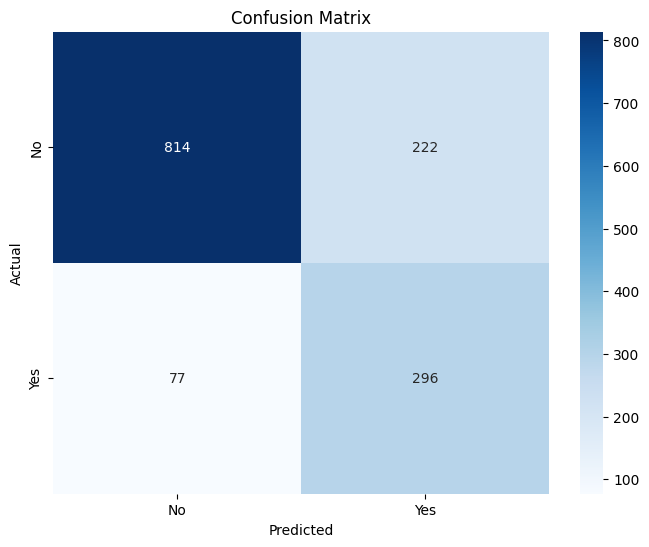

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Performance Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.91      0.79      0.84      1036
         Yes       0.57      0.79      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.79      0.80      1409



##### **Extract Decision  Trees from the Random Forest Model**

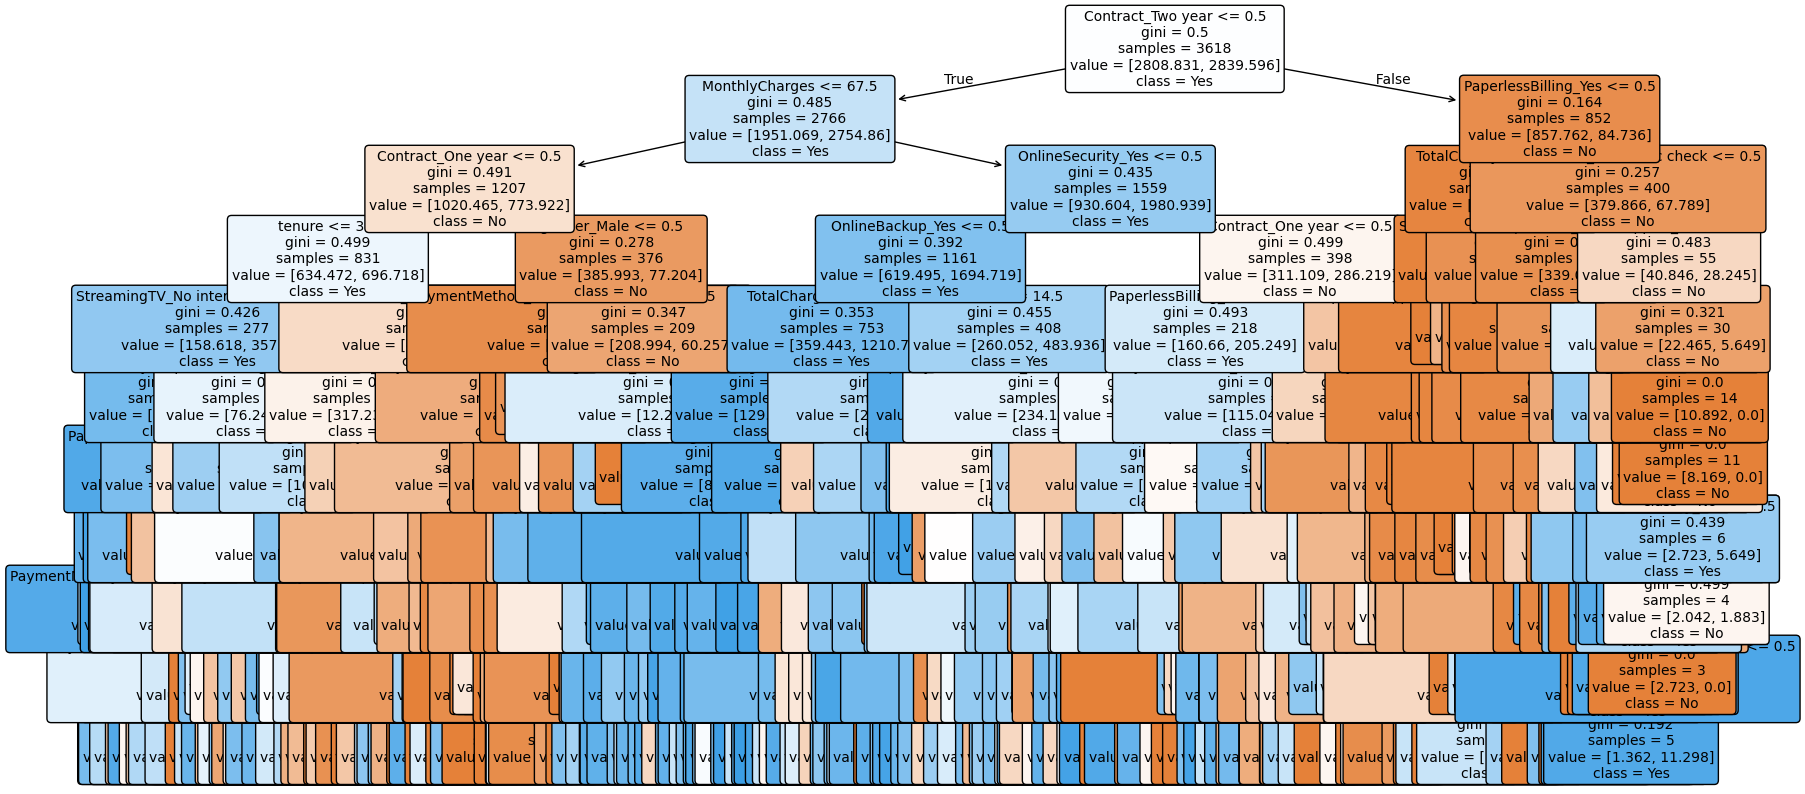

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

tree_to_plot = rf_model.estimators_[5]

plot_tree(tree_to_plot,
          feature_names=X_train.columns.tolist(),
          class_names=rf_model.classes_.tolist(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

#### **Receiver Operating Characterictis ROC and Area Under the Curve (AUC)**

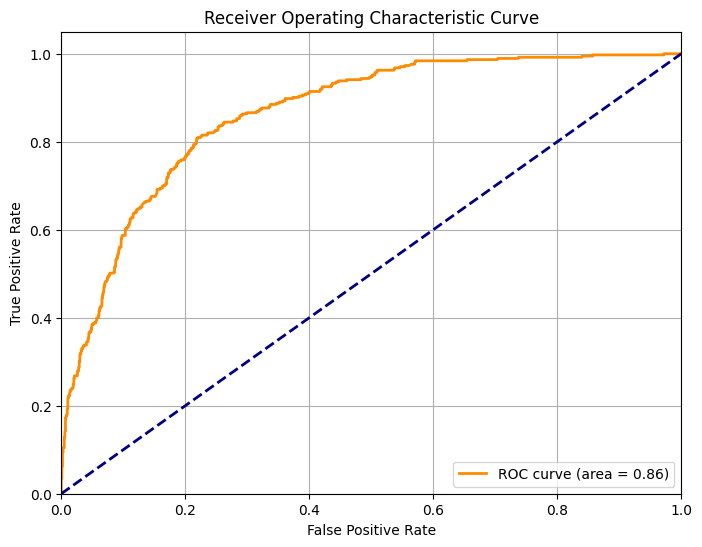

In [ ]:
### Import and load the required functions and libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### Plot the ROC and AUC Value
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

#### Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

### Calulate the AUC
roc_auc = auc(fpr, tpr)

#### Plot the ROC and AUC
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

##### **Features Importance**

In [ ]:
### get the features from random forest model
features_importance = rf_model.feature_importances_
features_importance

array([0.00993879, 0.18199685, 0.08514618, 0.1492172 , 0.0129118 ,
       0.01274895, 0.01438203, 0.00441827, 0.00458974, 0.01189899,
       0.06884636, 0.01155149, 0.0167087 , 0.03603153, 0.01185355,
       0.01604308, 0.0152821 , 0.01030662, 0.0151326 , 0.024242  ,
       0.01236135, 0.01025617, 0.01536394, 0.01184655, 0.04141126,
       0.10688114, 0.0181111 , 0.01052741, 0.05053451, 0.00945976])

In [ ]:
##### Extract the Features Names from the Training Data set
feature_names = X_train.columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
### Create a Data Frame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': features_importance})
importance_df

,Feature,Importance
0,SeniorCitizen,0.009939
1,tenure,0.181997
2,MonthlyCharges,0.085146
3,TotalCharges,0.149217
4,gender_Male,0.012912
5,Partner_Yes,0.012749
6,Dependents_Yes,0.014382
7,PhoneService_Yes,0.004418
8,MultipleLines_No phone service,0.004590
9,MultipleLines_Yes,0.011899


In [ ]:
#### Sort the Data Frame Based on the Importance Value
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
importance_df

,Feature,Importance
1,tenure,0.181997
3,TotalCharges,0.149217
25,Contract_Two year,0.106881
2,MonthlyCharges,0.085146
10,InternetService_Fiber optic,0.068846
28,PaymentMethod_Electronic check,0.050535
24,Contract_One year,0.041411
13,OnlineSecurity_Yes,0.036032
19,TechSupport_Yes,0.024242
26,PaperlessBilling_Yes,0.018111


#### **Plot Features Importance**

/tmp/ipython-input-3344876445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


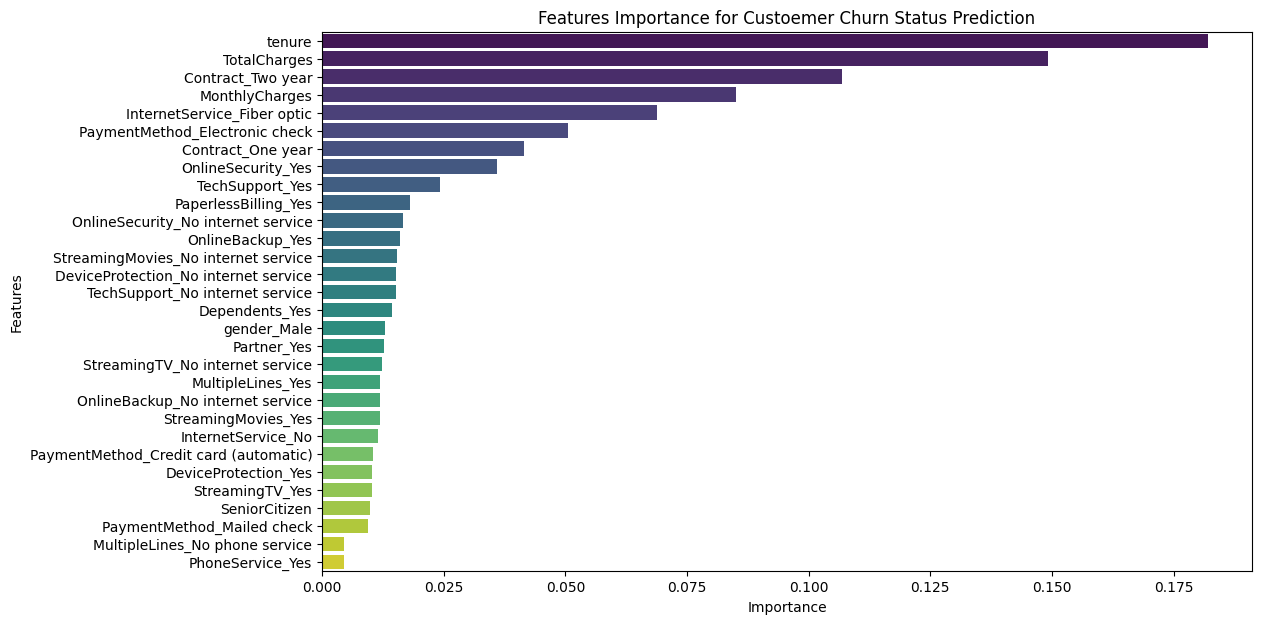

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Features Importance for Custoemer Churn Status Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### **Extrem Gradient Boosting**

In [ ]:
### Confirm the Observations Labels for the Target Variable
y_train.head()

,Churn
2142,No
1623,No
6074,Yes
1362,Yes
6754,No


In [ ]:
#### Map the Observation {Yes = 1, No = 0}
y_train_encoded = y_train.map({'Yes': 1, 'No': 0})
y_test_encoded = y_test.map({'Yes': 1, 'No': 0})

In [ ]:
y_train_encoded.head()

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0


In [ ]:
y_test_encoded.head()

,Churn
185,1
2715,0
3825,0
1807,1
132,0


#### **Initialize and Train the Model**

In [ ]:
#### Initialization Process
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state = 42, use_label_encoder = False, evaluation_metric = 'logloss' )
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              evaluation_metric='logloss', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [ ]:
#### Train thee XGBoost Model
xgb_model.fit(X_train, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [16:24:51] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "evaluation_metric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              evaluation_metric='logloss', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

#### **Predict the Customer Churn Status**

In [ ]:
#### Get the attributes of the XGBoost Model
dir(xgb_model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__sklearn_tags__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_se

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb[:5]

array([1, 0, 0, 1, 0])

In [ ]:
### Observe the First Five Obervations from thee y_test_encoded
y_test_encoded[:5]

,Churn
185,1
2715,0
3825,0
1807,1
132,0


### **Extract the Default Performance Metrics**

In [ ]:
### Import the Required Functionality
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


In [ ]:
### Calculation of the Metrics
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
precision_xgb = precision_score(y_test_encoded, y_pred_xgb)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

In [ ]:
#### Print the Metrics
print(accuracy_xgb)
print(precision_xgb)
print(f1_xgb)
print(conf_matrix_xgb)

0.78708303761533
0.6181229773462783
0.5601173020527859
[[918 118]
 [182 191]]


In [ ]:
acc = (918 + 191)/(918 + 191 + 182 + 118)
acc

0.78708303761533

#### **Plot the Confusion Matrix**

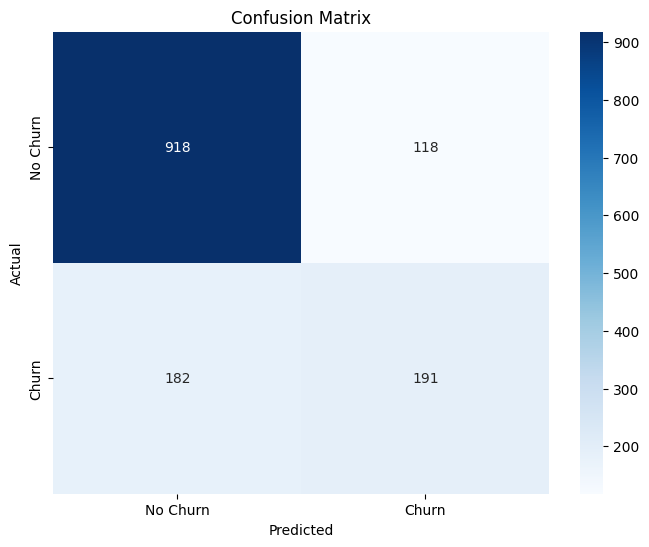

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Classification Report**

In [ ]:
report = classification_report(y_test_encoded, y_pred_xgb, target_names = ['No Churn', 'Churn'])
print(report)

              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1036
       Churn       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### **ROC and AUC**

In [ ]:
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


# Calculate the ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_encoded, y_pred_prob_xgb)

# Calculate the AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

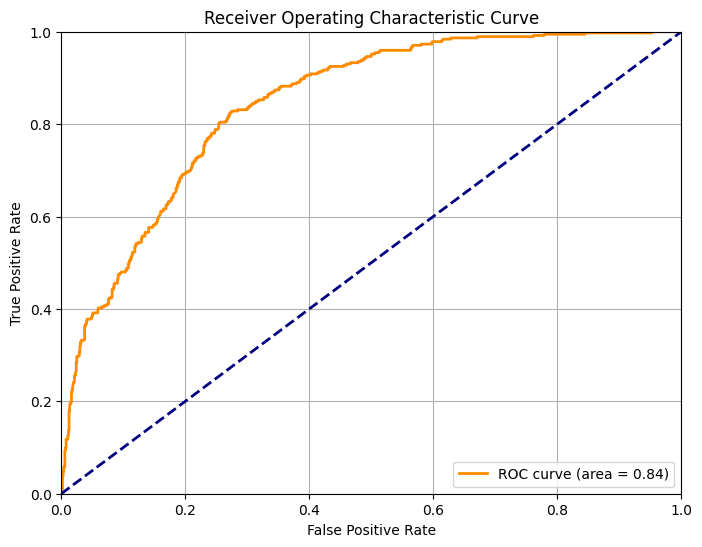

In [ ]:
### PLot the ROC and AUC
plt.figure(figsize = (8, 6))
plt.plot(fpr_xgb, tpr_xgb, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

#### **Feature Importance Plot**

In [ ]:
### Get the Feature Importance Value
feature_importance_xgb = xgb_model.feature_importances_
feature_importance_xgb

array([0.01390966, 0.02904212, 0.01353483, 0.01295431, 0.01141084,
       0.01019228, 0.01385336, 0.02448795, 0.        , 0.01785561,
       0.27045077, 0.1078604 , 0.        , 0.01629618, 0.        ,
       0.01336797, 0.        , 0.01319835, 0.        , 0.01637593,
       0.        , 0.0159412 , 0.        , 0.02544907, 0.07833924,
       0.23844814, 0.013563  , 0.01248513, 0.01839197, 0.01259174],
      dtype=float32)

In [ ]:
#### Get the Features Names
feature_names_xgb = X_train.columns
feature_names_xgb

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
### Create the Data Frame
importance_df_xgb = pd.DataFrame({'Feature': feature_names_xgb, 'Importance': feature_importance_xgb})
importance_df_xgb

,Feature,Importance
0,SeniorCitizen,0.013910
1,tenure,0.029042
2,MonthlyCharges,0.013535
3,TotalCharges,0.012954
4,gender_Male,0.011411
5,Partner_Yes,0.010192
6,Dependents_Yes,0.013853
7,PhoneService_Yes,0.024488
8,MultipleLines_No phone service,0.000000
9,MultipleLines_Yes,0.017856


In [ ]:
#### Sort and Arrange the Features Importance in Descending Order
importance_df_xgb = importance_df_xgb.sort_values(by = 'Importance', ascending = False)
importance_df_xgb

,Feature,Importance
10,InternetService_Fiber optic,0.270451
25,Contract_Two year,0.238448
11,InternetService_No,0.107860
24,Contract_One year,0.078339
1,tenure,0.029042
23,StreamingMovies_Yes,0.025449
7,PhoneService_Yes,0.024488
28,PaymentMethod_Electronic check,0.018392
9,MultipleLines_Yes,0.017856
19,TechSupport_Yes,0.016376


### **Plot the Features Importance**

/tmp/ipython-input-3856116300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Importance', y = 'Feature', data = importance_df_xgb, palette = 'viridis')


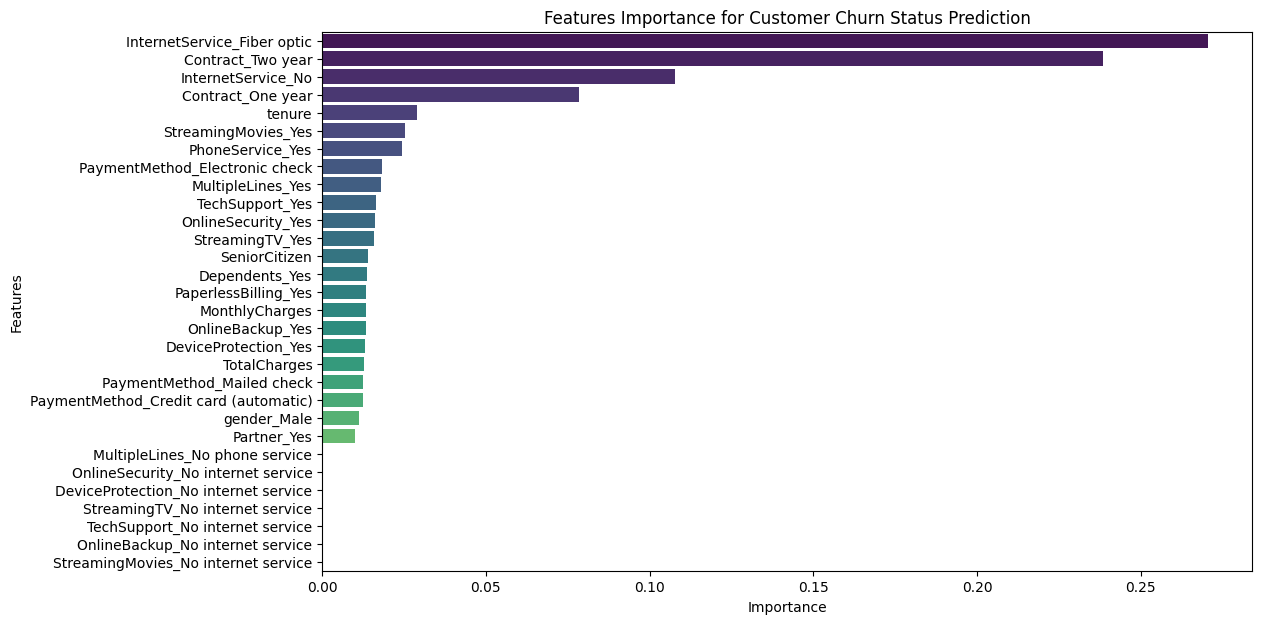

In [ ]:
plt.figure(figsize = (12, 7))
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df_xgb, palette = 'viridis')
plt.title('Features Importance for Customer Churn Status Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### **Performance Comparison Between Random Forest and Extreme Gradient Boosting**



##### **Extract the Performance for Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from statsmodels.stats.contingency_tables import mcnemar

In [ ]:
### 1. Convert the Prediction from Categorical to Binary
y_pred_rf[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [ ]:
y_pred_rf_numeic = np.array([1 if pred == 'Yes' else 0 for pred in y_pred_rf])

### 2. Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf_numeic)

### 3. Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix_rf.ravel()

### 4. Sensitivity (Recall/True Positive Rate)
sensitivity = TP / (TP + FN)

### 5. Specificity (True Negative Rate)
specificity = TN / (TN + FP)

### 6. False Positive Rate
fpr = FP / (FP + TN)

### 7. False Neegative Rate
fnr = FN / (FN + TP)

### 8. Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_test_encoded, y_pred_rf_numeic)

### No Information Rate
nir = y_test_encoded.value_counts().max()/len(y_test_encoded)

### McNemar's Test
mcnemar_results = mcnemar(conf_matrix_rf, exact=True, correction=True)
mcnemar_p_value = mcnemar_results.pvalue

### Balanced Accuracy
balanced_accuracy = (sensitivity + specificity) / 2

#### **Print the Results**

In [ ]:
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"False Negative Rate: {fnr:.4f}")
print(f"Cohen's Kappa: {cohen_kappa:.4f}")
print(f"No Information Rate: {nir:.4f}")
print(f"McNemar's Test P-value: {mcnemar_p_value:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

Sensitivity: 0.7936
Specificity: 0.7857
False Positive Rate: 0.2143
False Negative Rate: 0.2064
Cohen's Kappa: 0.5152
No Information Rate: 0.7353
McNemar's Test P-value: 0.0000
Balanced Accuracy: 0.7896


#### **Extract the Metrics for Extremee Gradient Boosting**

In [ ]:
### 1. Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)

### 2. Extract TN, FP, FN, TP
TN_xgb, FP_xgb, FN_xgb, TP_xgb = conf_matrix_xgb.ravel()

### 3. Sensitivity
sensitivity_xgb = TP_xgb / (TP_xgb + FN_xgb)

### 4. Specificity
specificity_xgb = TN_xgb / (TN_xgb + FP_xgb)

### 5. False Positive Ratee
fpr_xgb = FP_xgb / (FP_xgb + TN_xgb)

### 6. False Negative Rate
fnr_xgb = FN_xgb / (FN_xgb + TP_xgb)

### 7. Balance Accuracy
balanced_accuracy_xgb = (sensitivity_xgb + specificity_xgb) / 2

### 8. Cohen's Kappa
cohen_kappa_xgb = cohen_kappa_score(y_test_encoded, y_pred_xgb)

### 9. No information rate
nir_xgb = y_test_encoded.value_counts().max() / len(y_test_encoded)

### 10. McNemar's Test
mcnemar_results_xgb = mcnemar(conf_matrix_xgb, exact=True, correction=True)
mcnemar_p_value_xgb = mcnemar_results_xgb.pvalue


### **Print the Results for Extreme Gradient Boosting**

In [ ]:
print(f"Sensitivity: {sensitivity_xgb:.4f}")
print(f"Specificity: {specificity_xgb:.4f}")
print(f"False Positive Rate: {fpr_xgb:.4f}")
print(f"False Negative Rate: {fnr_xgb:.4f}")
print(f"Cohen'Kappa: {cohen_kappa_xgb:.4f}")
print(f"No Information Rate: {nir_xgb:.4f}")
print(f"McNemar's Test P-value: {mcnemar_p_value_xgb:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_xgb:.4f}")

Sensitivity: 0.5121
Specificity: 0.8861
False Positive Rate: 0.1139
False Negative Rate: 0.4879
Cohen'Kappa: 0.4213
No Information Rate: 0.7353
McNemar's Test P-value: 0.0003
Balanced Accuracy: 0.6991


### **Print the Results for the Two Models in a Data Frame**

In [ ]:
comparison_df = pd.DataFrame({
    "Metrics": [
        "Sensitivity",
        "Specificity",
        "False Positive Rate",
        "False Negative Rate",
        "Balanced Accuracy",
        "Cohen's Kappa",
        "No Information Rate",
        "McNemar's Test P-value"
        ],
    "Random Forest": [
        sensitivity,
        specificity,
        fpr,
        fnr,
        balanced_accuracy,
        cohen_kappa,
        nir,
        mcnemar_p_value
        ],
    "Extreme Gradient Boosting": [
        sensitivity_xgb,
        specificity_xgb,
        fpr_xgb,
        fnr_xgb,
        balanced_accuracy_xgb,
        cohen_kappa_xgb,
        nir_xgb,
        mcnemar_p_value_xgb
        ]
})


### **Print the Data Frame**

In [ ]:
comparison_df

,Metrics,Random Forest,Extreme Gradient Boosting
0,Sensitivity,7.935657e-01,0.512064
1,Specificity,7.857143e-01,0.886100
2,False Positive Rate,2.142857e-01,0.113900
3,False Negative Rate,2.064343e-01,0.487936
4,Balanced Accuracy,7.896400e-01,0.699082
5,Cohen's Kappa,5.151952e-01,0.421295
6,No Information Rate,7.352732e-01,0.735273
7,McNemar's Test P-value,1.872115e-17,0.000262
